In [1]:
import time
from tqdm import tqdm
import struct

#mensagembit = open("input.txt", 'rb').read()
#for i in range(0, len(mensagembit),2):
#    print(str(mensagembit[i]),str(mensagembit[i+1]))
#    print(chr(mensagembit[i]),chr(mensagembit[i+1]))
#    arr = bytearray([mensagembit[i],mensagembit[i+1]])
#    print(struct.unpack('H', arr))

#mensagem = open("corpus16MB.txt", "r", encoding='ISO-8859-1').read() #ANTES

mensagem = open("corpus16MB.txt", "rb").read()
mensagem = mensagem.decode('ISO-8859-1')
#print(len(mensagem))
#print(mensagem.encode())

rc = []
rcIdeal = []
tempo = []
k = []
for K in range(9,17):
    
    start = time.time()
    dicionario = {}

    for i in range(2**8):
        dicionario[i.to_bytes(1, 'big')] = i

    newValue = 256
    comprimida = []
    new = ''
    old = ''

    for letra in tqdm(mensagem):
        new = old + letra
        #print(new)
        if new.encode('ISO-8859-1') not in dicionario: 
            if len(dicionario) < 2**K:
                dicionario[new.encode('ISO-8859-1')] = newValue
                newValue += 1
            
            numCod = dicionario[old.encode('ISO-8859-1')]
            #print(numCod, ' -> ', chr(numCod))
            #print()
            comprimida.append(numCod)
            
            old = letra
        else:
            old = new

    numCod = dicionario[old.encode('ISO-8859-1')]
    comprimida.append(numCod)
    
    end = time.time()
    
    outFile = open("intermediarios\intermediarioK" + str(K) + ".txt" , "wb")
    #print(comprimida)
    for i in comprimida:
        #print(chr(i))
        outFile.write(struct.pack('H', i))
        
    print('K = %d' %K)
    print('tamanho: %d -> %d' %(len(mensagem),len(comprimida)))
    CM = len(comprimida) * 16 / len(mensagem)
    rc.append(8/CM) 
    CM = len(comprimida) * K / len(mensagem)
    rcIdeal.append(8/CM) 
    #print('RC: %f' % (8/CM))
    tempo.append(end-start)
    #print('tempo %f segundos\n' % (end-start))
    
    outFile.close()

    k.append(K)


  2%|█                                                                        | 234755/15637070 [00:00<00:13, 1166623.90it/s]

K = 9
tamanho: 15637070 -> 9157927


  1%|▌                                                                        | 115534/15637070 [00:00<00:13, 1149051.09it/s]

K = 10
tamanho: 15637070 -> 7366437


  1%|▌                                                                        | 120166/15637070 [00:00<00:13, 1192946.49it/s]

K = 11
tamanho: 15637070 -> 6136292


  1%|▌                                                                        | 119083/15637070 [00:00<00:13, 1180738.99it/s]

K = 12
tamanho: 15637070 -> 5310933


  1%|▌                                                                        | 112595/15637070 [00:00<00:13, 1118095.11it/s]

K = 13
tamanho: 15637070 -> 4701352


  1%|▌                                                                        | 111803/15637070 [00:00<00:13, 1110251.39it/s]

K = 14
tamanho: 15637070 -> 4200288


  1%|▌                                                                        | 112487/15637070 [00:00<00:13, 1116676.31it/s]

K = 15
tamanho: 15637070 -> 3765840


100%|███████████████████████████████████████████████████████████████████████| 15637070/15637070 [00:11<00:00, 1319818.66it/s]


K = 16
tamanho: 15637070 -> 3395047


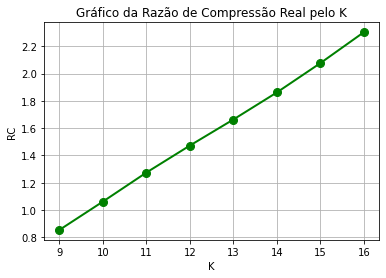

In [2]:
#GRÁFICO COM RC REAL#####################################

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

ax.plot(k, rc, 'go-', linewidth=2, markersize=8)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set(xlabel='K', ylabel='RC', title='Gráfico da Razão de Compressão Real pelo K')
ax.grid()

# fig.savefig("test.png")
plt.show()

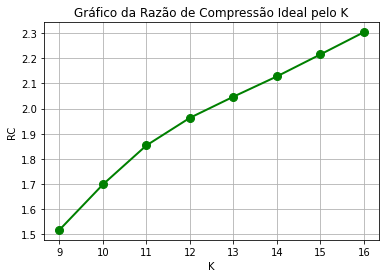

In [3]:
#GRÁFICO DO RC IDEAL###########################

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

ax.plot(k, rcIdeal, 'go-', linewidth=2, markersize=8)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set(xlabel='K', ylabel='RC', title='Gráfico da Razão de Compressão Ideal pelo K')
ax.grid()

# fig.savefig("test.png")
plt.show()

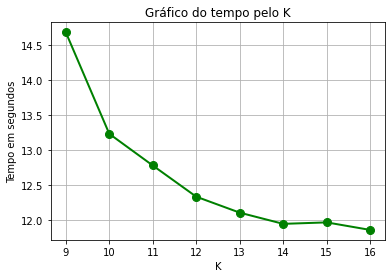

In [4]:
fig, bx = plt.subplots()

bx.plot(k, tempo, 'go-', linewidth=2, markersize=8)
bx.xaxis.set_major_locator(ticker.MultipleLocator(1))
bx.set(xlabel='K', ylabel='Tempo em segundos', title='Gráfico do tempo pelo K')
bx.grid()

plt.show()


In [5]:
import time
from tqdm import tqdm
import struct

for K in range(9,17):
    mensagem2 = open("intermediarios\intermediarioK" + str(K) + ".txt", "rb").read()
    #print(mensagem)
    mensagemInt = []
    for i in range(0,len(mensagem2),2):
        #print(str(mensagem[i]),str(mensagem[i+1]))
        #print(chr(mensagem[i]),chr(mensagem[i+1]))
        arr = bytearray([mensagem2[i],mensagem2[i+1]])
        #print(struct.unpack('H', arr))
        #if len(struct.unpack('H', arr)) > 1:
        #    print('letra: ',chr(struct.unpack('H', arr)[0]), ' e ', chr(struct.unpack('H', arr)[1]))
        #else:
        #    print('letra: ',chr(struct.unpack('H', arr)[0]))
        #print(struct.unpack('B', i.to_bytes(1,'big')))
        mensagemInt.append(struct.unpack('H', arr)[0])
    
    dicionario = {}

    for i in range(2**8):
        dicionario[i] = chr(i)  #string

    newKey = 256

    start = time.time()
    descomprimida = ''
    for i in tqdm(mensagemInt):
        #print('decodificando:', i, ' -> ', chr(i))
        if len(dicionario) <= 2**K:
            if newKey > 256:   #atualizar elemento anterior do dicionario
                dicionario[newKey-1] += dicionario[i][0]
        #print(dicionario[i])
        #print()
        descomprimida += dicionario[i]
        dicionario[newKey] = dicionario[i]  #criar elemento atual do dicionario
        newKey += 1

    #print(descomprimida.encode('ISO-8859-1'))
    end = time.time()

    outFile = open("saidas\saidaK" + str(K) + ".txt" , "wb")
    for i in descomprimida:
        outFile.write(struct.pack('B', ord(i)))

    print('K = %d' %K)
    print('tamanho: %d -> %d' %(len(mensagemInt),len(descomprimida)))

    tempo.append(end-start)
    print('tempo %f segundos\n' % (end-start))

    outFile.close()


100%|██████████████████████████████████████████████████████████████████████████| 9157927/9157927 [00:19<00:00, 470241.41it/s]


K = 9
tamanho: 9157927 -> 15637070
tempo 19.474948 segundos



100%|██████████████████████████████████████████████████████████████████████████| 7366437/7366437 [00:17<00:00, 412328.38it/s]


K = 10
tamanho: 7366437 -> 15637070
tempo 17.868423 segundos



100%|██████████████████████████████████████████████████████████████████████████| 6136292/6136292 [00:17<00:00, 358075.20it/s]


K = 11
tamanho: 6136292 -> 15637070
tempo 17.138875 segundos



100%|██████████████████████████████████████████████████████████████████████████| 5310933/5310933 [00:16<00:00, 328103.39it/s]


K = 12
tamanho: 5310933 -> 15637070
tempo 16.187764 segundos



100%|██████████████████████████████████████████████████████████████████████████| 4701352/4701352 [00:16<00:00, 292607.98it/s]


K = 13
tamanho: 4701352 -> 15637070
tempo 16.071058 segundos



100%|██████████████████████████████████████████████████████████████████████████| 4200288/4200288 [00:15<00:00, 273218.75it/s]


K = 14
tamanho: 4200288 -> 15637070
tempo 15.375352 segundos



100%|██████████████████████████████████████████████████████████████████████████| 3765840/3765840 [00:15<00:00, 242725.45it/s]


K = 15
tamanho: 3765840 -> 15637070
tempo 15.516809 segundos



100%|██████████████████████████████████████████████████████████████████████████| 3395047/3395047 [00:15<00:00, 213499.21it/s]


K = 16
tamanho: 3395047 -> 15637070
tempo 15.904884 segundos



In [6]:
import filecmp
filecmp.cmp('corpus16MB.txt', "saidas\saidaK9.txt")


True